In [17]:
from sklearn.datasets import load_iris
df=load_iris()
dir(df)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [29]:
df.frame

In [6]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
df1=pd.DataFrame(columns=df.feature_names,data=df.data)

In [22]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
len(df1)==len(df.target)

True

In [26]:
df1["Flower"]=df.target

In [27]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


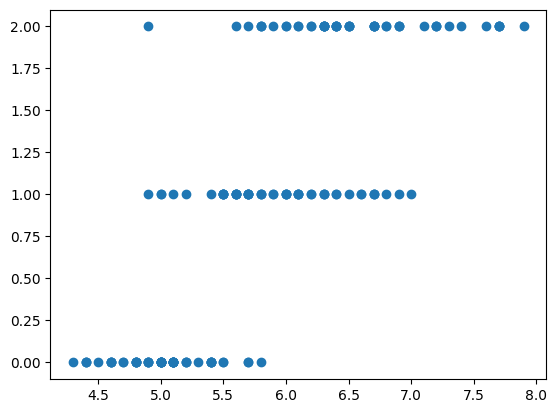

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df1["sepal length (cm)"],df1["Flower"],label=df1["Flower"])
plt.show()

In [34]:
df1["Flower_name"]=df1.Flower.apply(lambda x:df.target_names[x])

In [35]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [42]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
df_s=df1[df1.Flower_name=="setosa"]
df_v=df1[df1.Flower_name=="versicolor"]
df_s.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


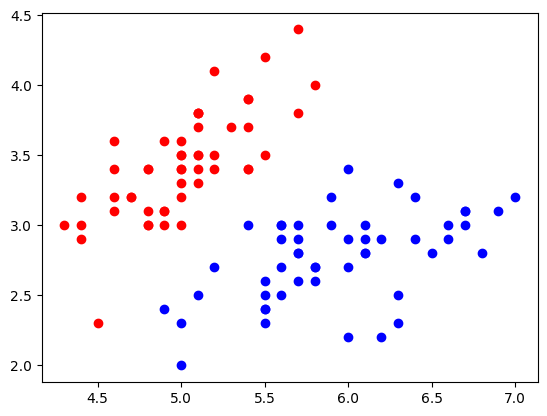

In [44]:
plt.scatter(df_s["sepal length (cm)"],df_s["sepal width (cm)"],color="red")
plt.scatter(df_v["sepal length (cm)"],df_v["sepal width (cm)"],color="blue")

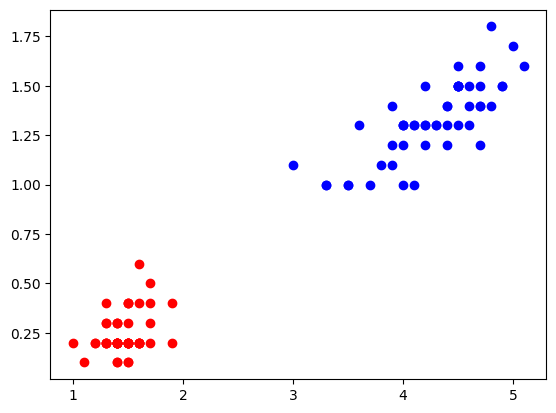

In [45]:
plt.scatter(df_s["petal length (cm)"],df_s["petal width (cm)"],color="red")
plt.scatter(df_v["petal length (cm)"],df_v["petal width (cm)"],color="blue")

In [48]:
X=df1.drop(["Flower","Flower_name"],axis="columns")
y=df1["Flower"]

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [50]:
from sklearn.svm import SVC
model=SVC(kernel="linear")

In [51]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [52]:
model.score(X_test,y_test)

1.0

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(model.predict(X_test),y_test)

<Axes: >

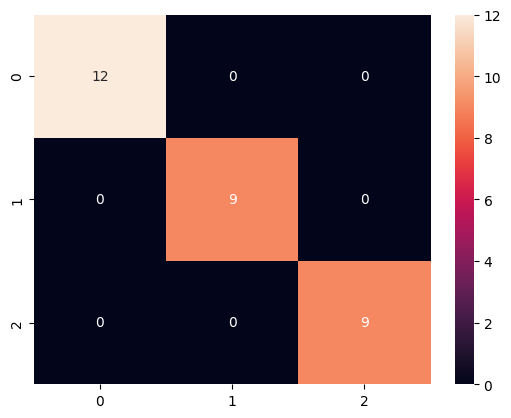

In [57]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [58]:
model.predict([[5.1,3.4,1.4,0.2]])

c:\Users\annad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [65]:
from joblib import dump,load

In [66]:
dump(model,"SVM.pkl")

['SVM.pkl']

In [67]:
s=load("SVM.pkl")
s.predict([[2.4,3.1,1.5,2.4]])

c:\Users\annad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])